# Two Mass system


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from explicit_integration import *

def dydt(t, y):
    """
    Computes dy/dt for the system:
        x1' = v1
        x2' = v2
        v1' = (1/m1) * ( c2*(x2 - x1) - c1*x1 + F*cos(omega*t) )
        v2' = (1/m2) * ( -c2*(x2 - x1) )
    
    Parameters
    ----------
    t : float
        Current time
    y : array-like of length 4
        State vector [x1, x2, v1, v2]
    m1, m2 : float
        Masses
    c1, c2 : float
        Stiffness coefficients
    F : float
        Forcing amplitude
    omega : float
        Forcing frequency

    Returns
    -------
    dydt : list of length 4
        Time derivatives [x1', x2', v1', v2']
    """

    # unpack state vector (x1, x2, v1, v2)
    x1, x2, v1, v2 = y

    m1 = 1      # mass 1 / kg
    m2 = 0.01   # mass 2 / kg
    c1 = 100    # stiffness 1 / N/m
    c2 = 10000  # stiffness 2 / N/m    
    F = 1       # forcing amplitude / N
    omega = 8   # excitation frequency / rad/s

    f = np.zeros(4)
    f[0] = v1
    f[1] = v2
    f[2] = (c2*(x2 - x1) - c1*x1 + F*np.cos(omega*t)) / m1
    f[3] = (-c2*(x2 - x1)) / m2

    return f

Solution

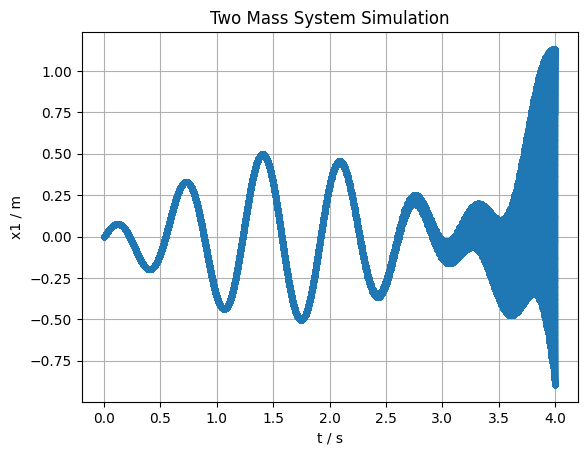

In [45]:
# initial conditions
y0 = [0, 0, 0, 0]  

# number of steps (n_crit = 700000)
n = 700000        

# integration
t, y = explicit_Euler(dydt, (0, 4), y0, n)

# plot results
plt.plot(t, y[:, 2], '-o', markersize=3)
plt.grid()
plt.xlabel('t / s')
plt.ylabel('x1 / m')
plt.title('Two Mass System Simulation')
plt.show()